# Inverse Translatation of a Stochastic Process
Author: Lohit Vandanapu
Date: May 14, 2019

In this example, a Gaussian stochastic processes is first translated into a stocahstic processes of a different distribution and subsequently, these translated samples are translated back to Gaussian samples with InverseTranslate class.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the InverseTranslation class along with the Translation class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.StochasticProcess import Translation, InverseTranslation
from UQpy.StochasticProcess import SRM
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Firstly we generate Gaussian Stochastic Processes using the Spectral Representation Method.

In [2]:
n_sim = 10000  # Num of samples
T = 100  # Time(1 / T = dw)
nt = 256  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dt = T / nt
t = np.linspace(0, T - dt, nt)
dw = F / nw
w = np.linspace(0, F - dw, nw)
S = 125 / 4 * w ** 2 * np.exp(-5 * w)
SRM_object = SRM(n_sim, S, dw, nt, nw, case='uni')
samples = SRM_object.samples

In [3]:
def S_to_R(S, w, t):
    dw = w[1] - w[0]
    fac = np.ones(len(w))
    fac[1: len(w) - 1: 2] = 4
    fac[2: len(w) - 2: 2] = 2
    fac = fac * dw / 3
    R = np.zeros(len(t))
    for i in range(len(t)):
        R[i] = 2 * np.dot(fac, S * np.cos(w * t[i]))
    return R

In [4]:
R = S_to_R(S, w, t)

We translate the samples to be Uniform samples from 1 to 2

In [5]:
Translate_object = Translation(samples, 'Uniform', [0, 1], dt, dw, nt, nw, R_g=R)
samples_ng = Translate_object.samples_ng
R_ng = Translate_object.R_ng
r_ng = Translate_object.r_ng

Plotting the actual and translated autocorrelation functions

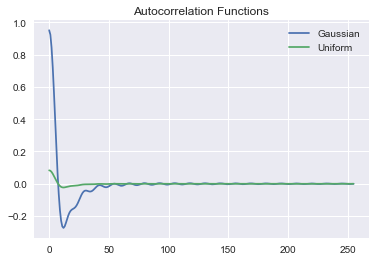

In [6]:
fig1 = plt.figure()
plt.plot(R, label='Gaussian')
plt.plot(R_ng, label='Uniform')
plt.title('Autocorrelation Functions')
plt.legend()
plt.show()

In [7]:
InverseTranslate_object = InverseTranslation(samples_ng, 'Uniform', [0, 1], dt, dw, nt, nw, R_ng=R_ng)
samples_g = InverseTranslate_object.samples_g
S_g = InverseTranslate_object.S_g
R_g = InverseTranslate_object.R_g
r_g = InverseTranslate_object.r_g

came here
1.3256267301660396
[0.00061588 0.00081008 0.0014168  0.00243286 0.00379584 0.00543986
 0.00732275 0.00941347 0.01167132 0.01404119 0.01646837 0.01891759
 0.02137797 0.02384878 0.02631902 0.02875923 0.03113268 0.03341541
 0.0356067  0.03772022 0.03976359 0.04172483 0.04357776 0.04530152
 0.04689638 0.04838147 0.04977618 0.05108197 0.05228081 0.05335189
 0.05429142 0.05511771 0.05585661 0.05652034 0.05709863 0.05757042
 0.05792557 0.05817715 0.05835296 0.05847371 0.05853736 0.05852398
 0.05841678 0.05822073 0.0579616  0.05766621 0.05734134 0.05697038
 0.05653118 0.05601908 0.05545441 0.05486736 0.05427359 0.05366241
 0.05300866 0.05229785 0.05154198 0.05077151 0.05001035 0.04925605
 0.0484836  0.04766968 0.04681579 0.04594928 0.04510078 0.04427789
 0.04345924 0.04261478 0.04173428 0.04083849 0.03996229 0.03912429
 0.03831039 0.03748683 0.03663139 0.03575489 0.03489322 0.03407589
 0.03329946 0.03253026 0.03173492 0.03091143 0.03009265 0.02931786
 0.02859712 0.0279013  0.02718782

0.03116463850514649
[0.00021966 0.00035936 0.0009048  0.00199425 0.00353649 0.00534006
 0.00728318 0.00934522 0.01155178 0.01391177 0.01638914 0.01891475
 0.0214224  0.02388137 0.02630025 0.02870039 0.03108346 0.03341983
 0.03566476 0.03778807 0.03979214 0.04170249 0.0435398  0.04529836
 0.04694882 0.04846217 0.04983394 0.05108732 0.05225204 0.05333843
 0.05432964 0.05519824 0.05593254 0.05654928 0.05708073 0.05754812
 0.05794555 0.05824827 0.05843802 0.05852278 0.05853285 0.05849648
 0.05841764 0.05827579 0.05804758 0.05773144 0.05735241 0.05694247
 0.05651451 0.05605373 0.05553385 0.05494392 0.05430147 0.05363927
 0.052978   0.05230993 0.05160827 0.05085375 0.05005489 0.04924261
 0.0484439  0.04765913 0.04686344 0.04603092 0.04516031 0.04427823
 0.04341631 0.04258349 0.04175918 0.04091291 0.04003353 0.03914126
 0.03827033 0.03743833 0.03663097 0.03581553 0.03497145 0.03411077
 0.03326817 0.03246944 0.03170827 0.03095212 0.030172   0.02937028
 0.02857989 0.02783402 0.02713564 0.026454

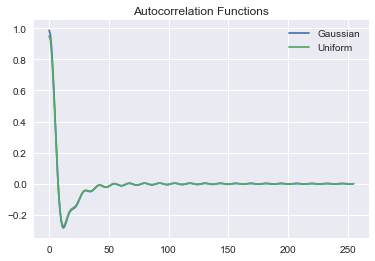

In [8]:
fig1 = plt.figure()
plt.plot(R_g, label='Inverse Translated')
plt.plot(R, label='Original')
plt.title('Autocorrelation Functions')
plt.legend()
plt.show()